In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# reading the csv file
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# getting the statistical summary of the data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

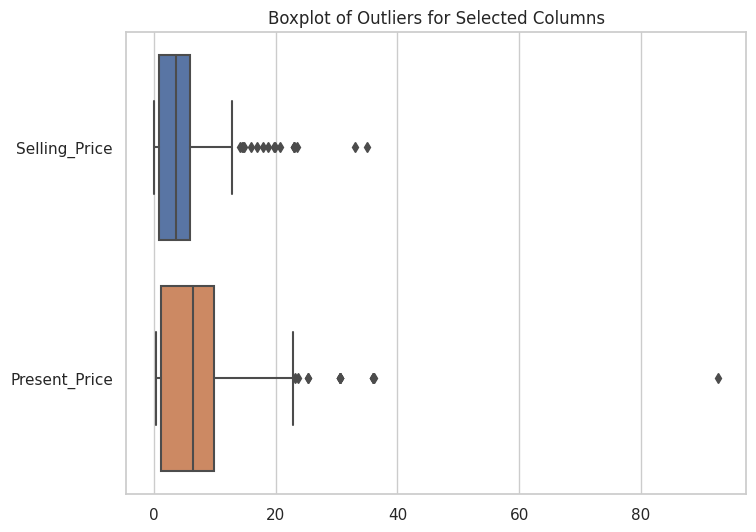

In [ ]:
# visluazing the outliers in the numerical columns
selected_columns = ["Selling_Price", "Present_Price"]
selected_df = df[selected_columns]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_df, orient="h")
plt.title("Boxplot of Outliers for Selected Columns")
plt.show()

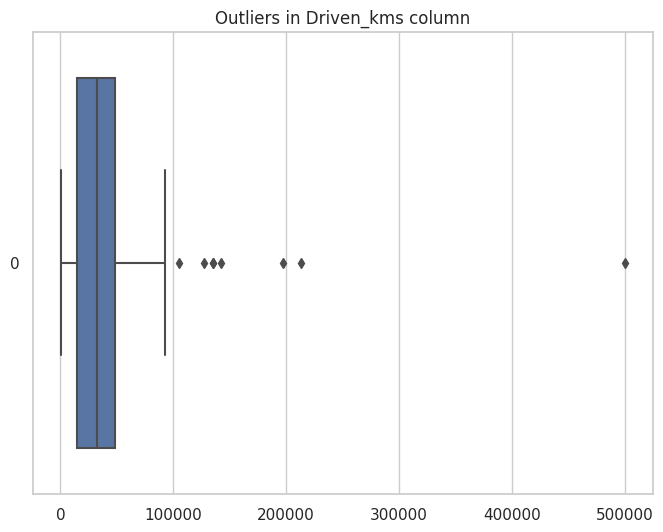

In [ ]:
# visualizing the outliers in Driven_kms column
selected_columns = ["Driven_kms"]
selected_df = df[selected_columns]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_df, orient="h")
plt.title("Boxplot of Outliers for Selected Columns")
plt.show()

**EDA**

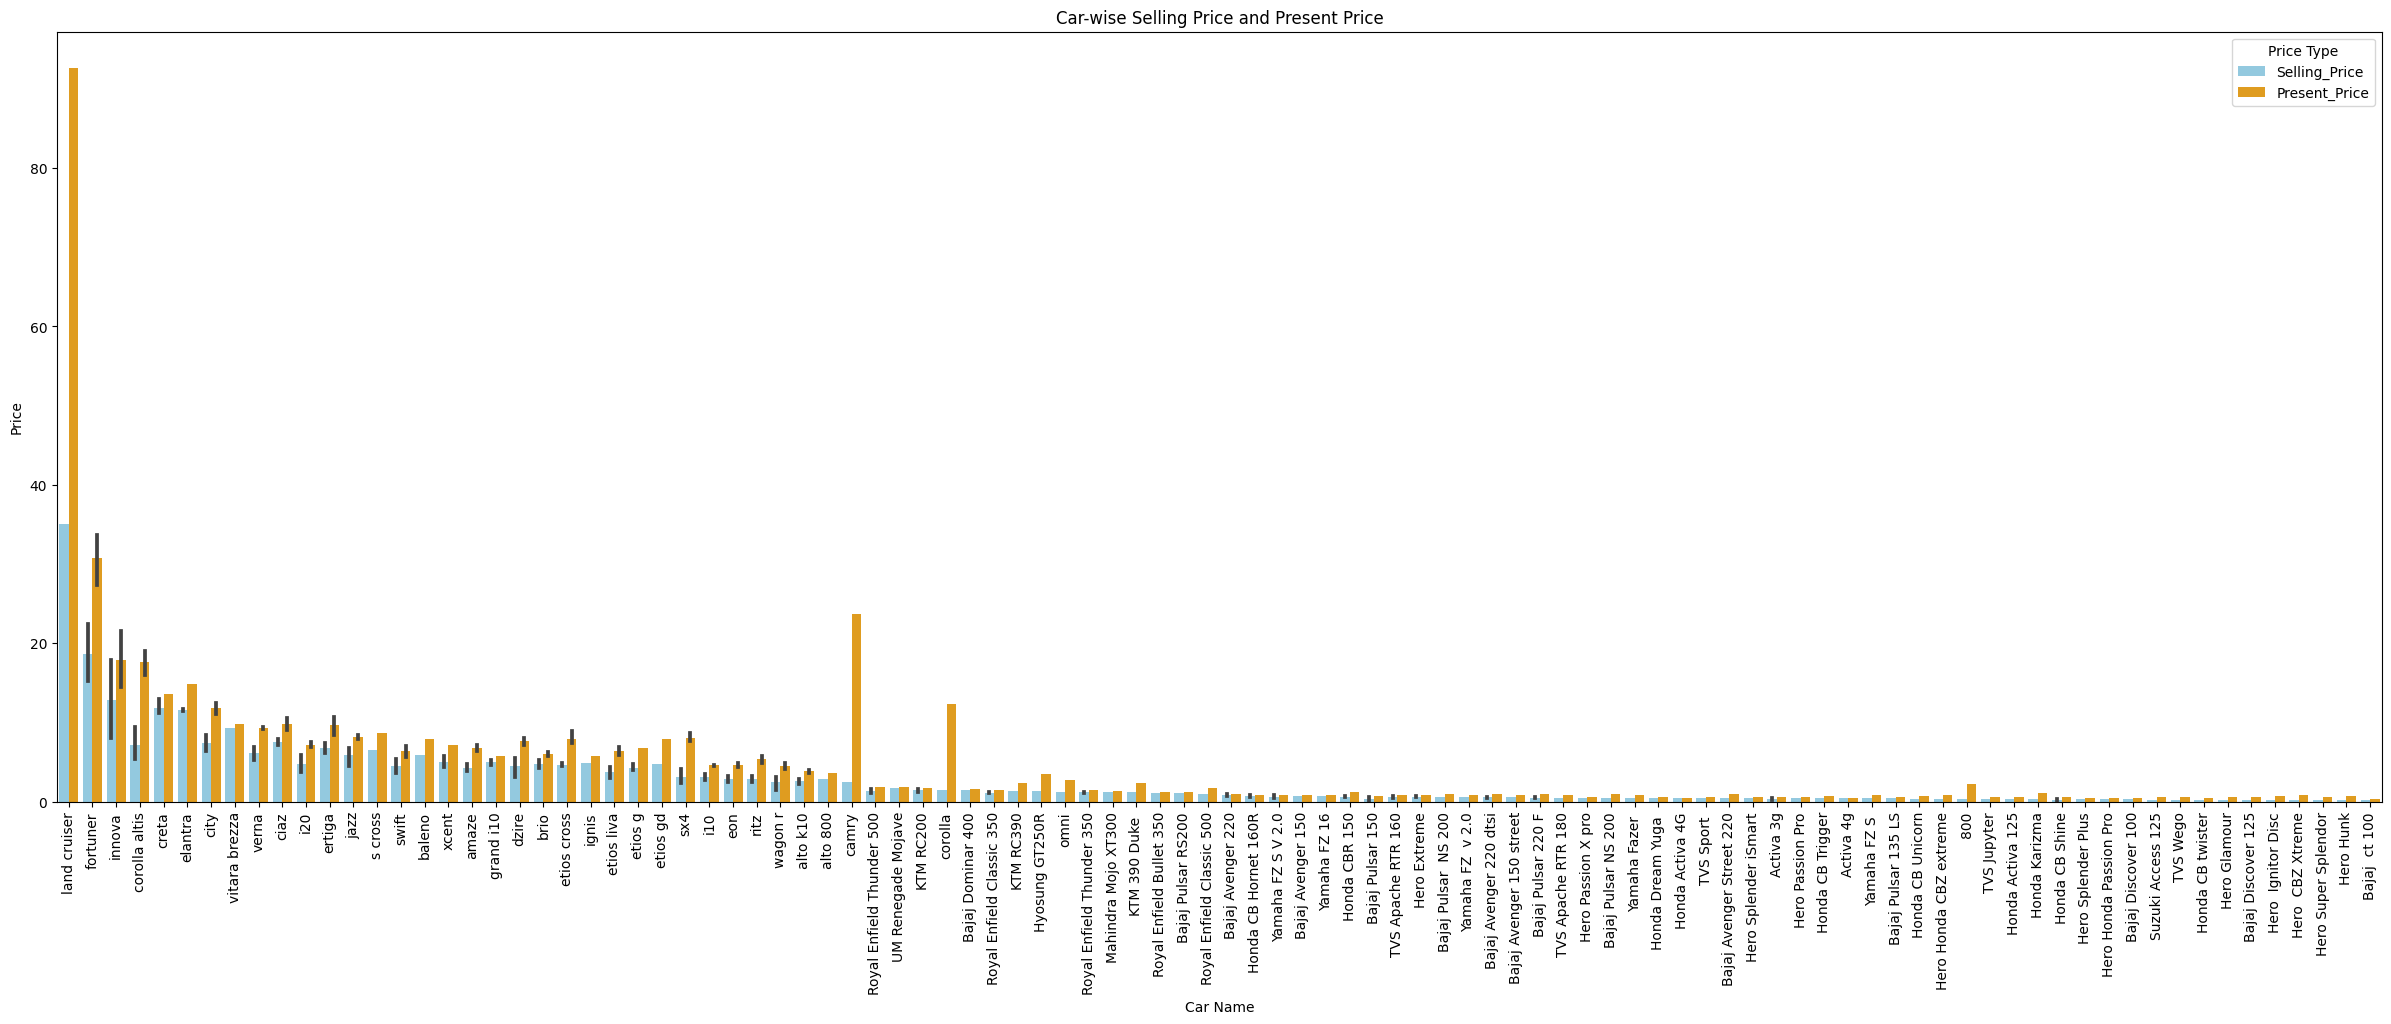

In [ ]:
# visualizing the variation between the selling and present price of the cars
df = df.sort_values(by='Selling_Price', ascending=False)
df_stacked = df.melt(id_vars='Car_Name', value_vars=['Selling_Price', 'Present_Price'], var_name='Price_Type', value_name='Price')
plt.figure(figsize=(30, 10))
sns.barplot(x='Car_Name', y='Price', data=df_stacked, hue='Price_Type', palette=['skyblue', 'orange'])
plt.xlabel('Car Name')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Car-wise Selling Price and Present Price')
plt.legend(title='Price Type', loc='best')
plt.show()

# Outcomes we observed:

# 1. There is not much difference between the selling and current prices of most cars, except for 2-3 car brands.

# 2. The Land Cruiser has the greatest variation in prices and is also the most expensive car.

# 3. The Bajaj CT 100 is the cheapest vehicle.

# 4. Brands with the highest variation in selling and current prices are Land Cruiser, Camry, and Corolla.

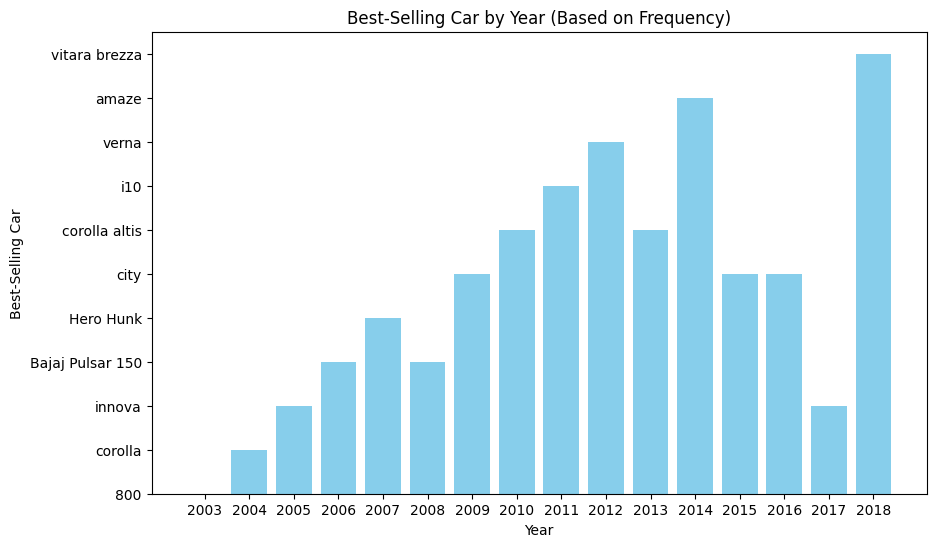

In [ ]:
# visualizing year wise best selling or most popular car
best_selling_cars = df.groupby('Year')['Car_Name'].apply(lambda x: x.mode().iloc[0]).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(best_selling_cars['Year'], best_selling_cars['Car_Name'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Best-Selling Car')
plt.title('Best-Selling Car by Year (Based on Frequency)')
plt.xticks(best_selling_cars['Year'])
plt.show()


# Outcomes observed:
# 1. The Vitara Brezza has the all-time highest sales and is the most popular.
# 2. The 800 is the least popular car of all time.

In [ ]:
encoder = LabelEncoder()
df['Selling_type'] = encoder.fit_transform(df['Selling_type'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,0,1,0


In [ ]:
dummies = pd.get_dummies(df['Fuel_Type'], prefix="Fuel")

In [ ]:
df = pd.concat([df, dummies], axis=1)

df = df.drop("Fuel_Type", axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0


In [ ]:
col = ['Car_Name']
df = df.drop(col, axis=1)

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,2014,3.35,5.59,27000,0,1,0,0,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1,0
2,2017,7.25,9.85,6900,0,1,0,0,0,1
3,2011,2.85,4.15,5200,0,1,0,0,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1,0


In [ ]:
x=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [ ]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=32)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = SVR(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(f'R2 score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

R2 score: 0.9044320833965382
mse: 1.1655586223506331


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=32)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(f'R2 score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

R2 score: 0.8888633275611728
mse: 1.3554371741503544


In [ ]:
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(f'R2 score: {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

R2 score: 0.9349016546554586
mse: 0.7939478060604805


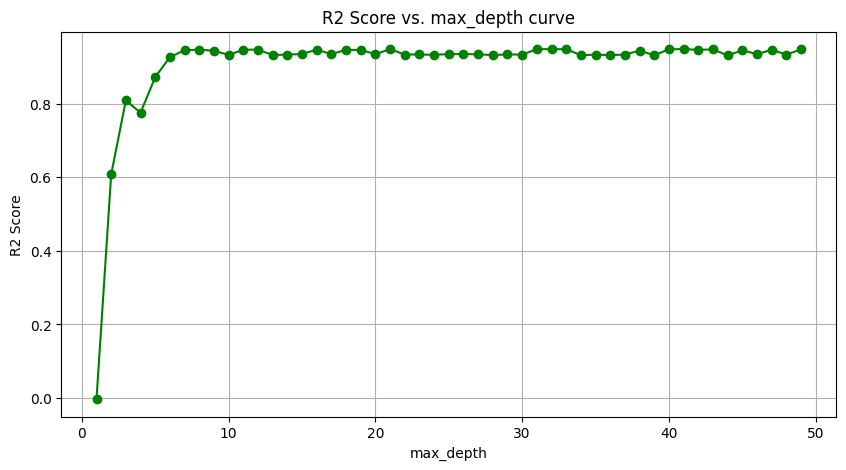


Max R2 Score: 0.9480292521812972 at max_depth = 42


In [ ]:
max_depths = range(1, 50)
r2_scores = []

for i in max_depths:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

max_accuracy = max(r2_scores)
max_depth = max_depths[r2_scores.index(max_accuracy)+1]

# Plot the R2 score as a curve
plt.figure(figsize=(10, 5))
plt.plot(max_depths, r2_scores, marker='o', linestyle='-', color='g')
plt.title('R2 Score vs. max_depth curve')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()
print()
print(f"Max R2 Score: {max_accuracy} at max_depth = {max_depth}")

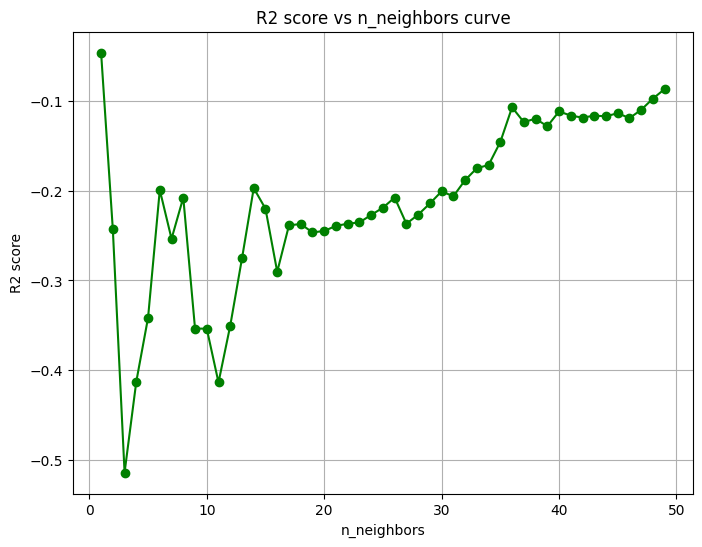


Max R2 score: -0.046161147771441646 at n_neighbors = 2


In [ ]:
n_values = range(1, 50)
r2_scores_list = []

for i in n_values:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_list.append(r2)

max_r2 = max(r2_scores_list)
best_n = n_values[r2_scores_list.index(max_r2) + 1]

plt.figure(figsize=(8, 6))
plt.plot(n_values, r2_scores_list, marker='o', linestyle='-', color='g')
plt.title("R2 score vs n_neighbors curve")
plt.xlabel('n_neighbors')
plt.ylabel('R2 score')
plt.grid(True)
plt.show()

print()
print(f'Max R2 score: {max_r2} at n_neighbors = {best_n}')


**Overall Maximum accuracy of 95.12% ~ 95% is acheived by Decision Tree Regressor(When solved as Regression Problem)**

In [ ]:
label = [0,1,2]
y = pd.qcut(y,q=3,labels=label)
y

0      1
1      1
2      2
3      1
4      1
      ..
296    2
297    1
298    1
299    2
300    2
Name: Selling_Price, Length: 301, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=32)


In [ ]:
y_train

14     1
181    0
20     1
202    1
54     1
      ..
71     1
252    2
88     1
43     2
215    1
Name: Selling_Price, Length: 270, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [ ]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {acc}')
print(report)

Accuracy: 0.3870967741935484
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.40      0.60      0.48        10
           2       0.00      0.00      0.00         9

    accuracy                           0.39        31
   macro avg       0.32      0.37      0.33        31
weighted avg       0.34      0.39      0.36        31



In [ ]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {acc}')
print(report)

Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        31
   macro avg       0.97      0.96      0.96        31
weighted avg       0.97      0.97      0.97        31



In [ ]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {acc}')
print(report)

Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.82      0.90      0.86        10
           2       1.00      0.89      0.94         9

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



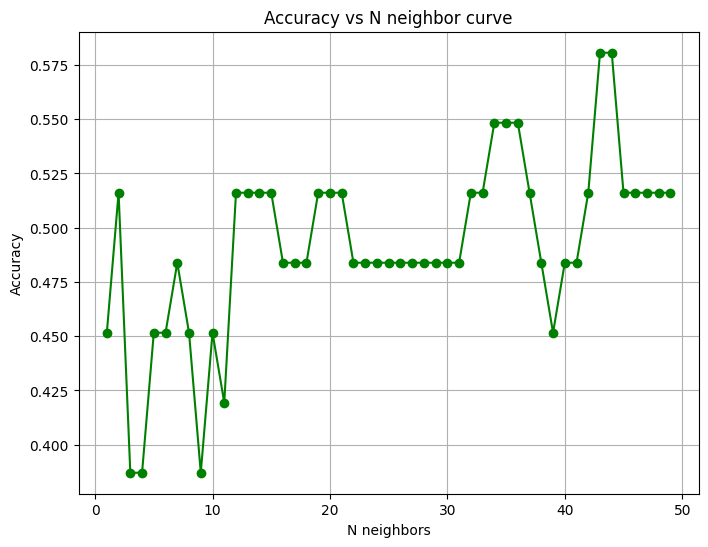


Max accuracy: 0.5806451612903226 is acheived at n=44


In [ ]:
n_values = range(1,50)
acc_list = []
for i in n_values:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

max_acc = max(acc_list)
best_n = n_values[acc_list.index(max_acc)+1]

plt.figure(figsize=(8,6))
plt.plot(n_values, acc_list, marker='o', linestyle='-', color='g')
plt.title("Accuracy vs N neighbor curve")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print()
print(f'Max accuracy: {max_acc} is acheived at n={best_n}')

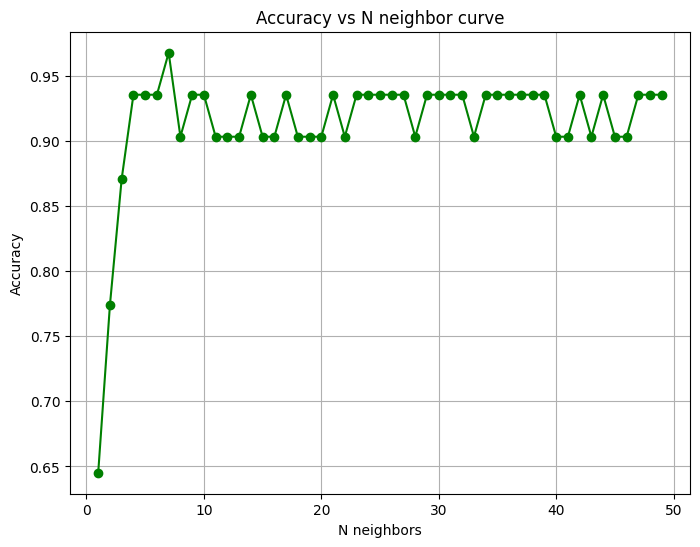


Max accuracy: 0.967741935483871 is acheived at n=7


In [ ]:
depths = range(1,50)
acc_list = []
for i in depths:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

max_acc = max(acc_list)
best_n = n_values[acc_list.index(max_acc)]

plt.figure(figsize=(8,6))
plt.plot(n_values, acc_list, marker='o', linestyle='-', color='g')
plt.title("Accuracy vs N neighbor curve")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print()
print(f'Max accuracy: {max_acc} is acheived at n={best_n}')

In [ ]:
best_model = DecisionTreeClassifier(max_depth=7)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         9

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



**Maximum Accuracy achived is 96.778% ~ 97% by Decision Tree (When solved as Classification Problem)**

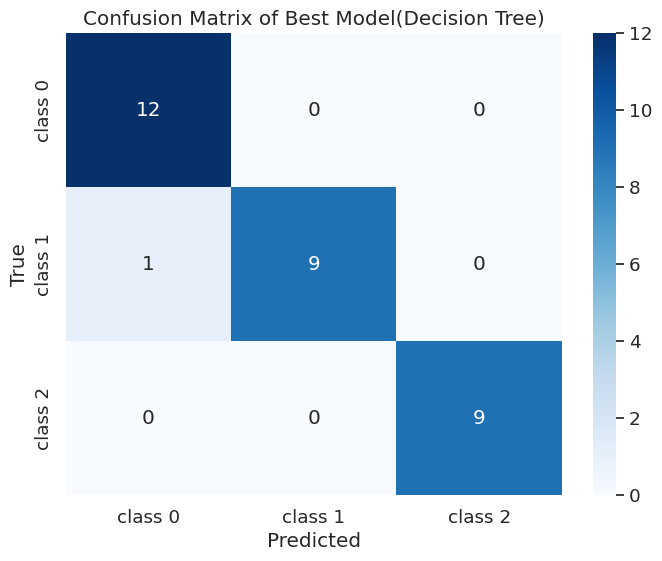

In [ ]:
class_labels = ['class 0','class 1', 'class 2']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Best Model(Decision Tree)")
plt.show()